# AI translation validation for Ubuntu - Model experiments
Romain Darous <br><br>
Exploration with the HuggingFace model ``sentence-transformers/distiluse-base-multilingual-cased-v2``

## Importing relevant modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sentence_transformers import SentenceTransformer

c:\Users\Romain Darous\AppData\Local\Programs\Python\Python312\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


## Loading a data sample for experimenting

In [6]:
# Loading the data
data_path = 'G:\\Mon Drive\\Master_Thesis_Canonical\\0_project_pipeline\\2_data_processing\\tmp\\dataset\\debian-handbook-da.csv'
df = pd.read_csv(data_path, sep='\t')
en = list(df['en'][:50])
target = list(df['da'][:50])

## Loading the multilingual sentence embedding model

In [7]:
model = SentenceTransformer('sentence-transformers/distiluse-base-multilingual-cased-v2')

# Computing the embeddings of the dataset
en_embeddings = model.encode(en)
target_embeddings = model.encode(target)

c:\Users\Romain Darous\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Romain Darous\.cache\huggingface\hub\models--sentence-transformers--distiluse-base-multilingual-cased-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
c:\Users\Romain Darous\AppData\Local\Pr

## Comparing embeddings
The easiest way to compare two vectors is to use cosine similarity.

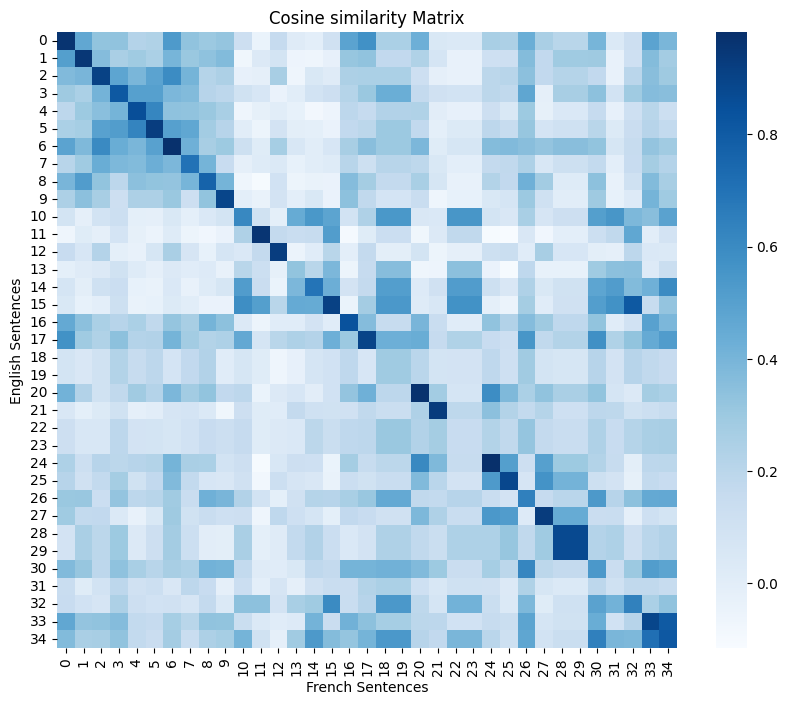

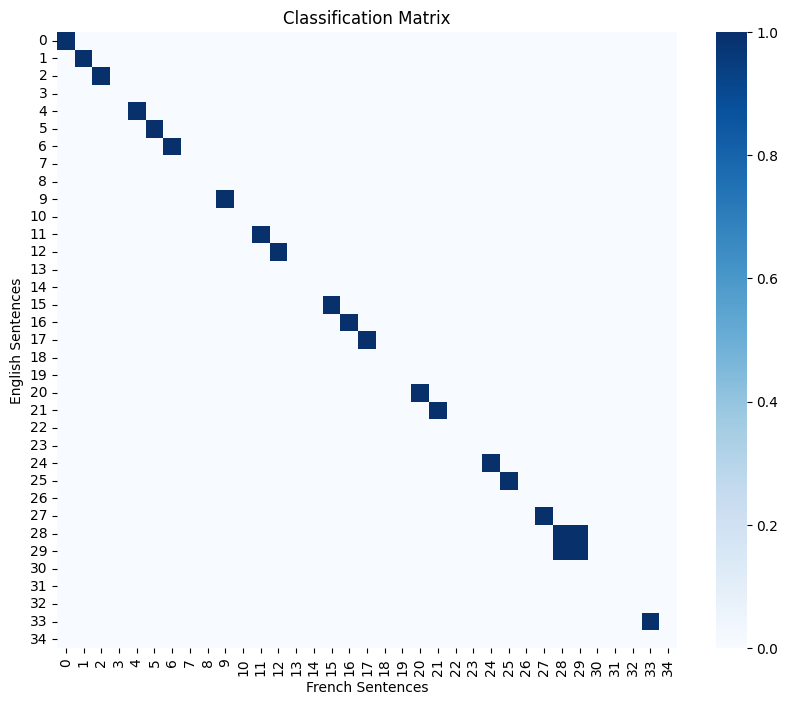

In [12]:
# Calculate cosine similarity
cosine_similarities = cosine_similarity(en_embeddings, target_embeddings)


# Create a threshold matrix
correct_threshold = 0.83
correct_confusion_matrix = np.array([[1 if sim > correct_threshold else 0 for sim in cos_sim] for cos_sim in cosine_similarities])
incorrect_threshold = 0.4


# Plot the threshold matrix and the cosine similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_similarities, annot=False, cmap='Blues', cbar=True)
plt.xlabel('French Sentences')
plt.ylabel('English Sentences')
plt.title('Cosine similarity Matrix')
plt.show()

# Plot the threshold matrix and the cosine similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correct_confusion_matrix, annot=False, cmap='Blues', cbar=True)
plt.xlabel('French Sentences')
plt.ylabel('English Sentences')
plt.title('Classification Matrix')
plt.show()



## Detecting potential mistranslations
To perform one the data is correctly cleaned and processed.

In [15]:
incorrect_threshold = 0.4
for i in range(len(cosine_similarities)) :
    if cosine_similarities[i][i] < incorrect_threshold :
        print(en[i], target[i], i)

analyzer, of log files dokumentation 13
Concurrent Versions System. Package Tracking System. Long Term Support. uncompressing, binary package. tilde, usagein versions dokumentation. dokumentation. dokumentation. Linuxpakke. Linuxpakke 18
Concurrent Versions System. Package Tracking System. Long Term Support. uncompressing, binary package. tilde, usagein versions dokumentation. dokumentation. dokumentation. Linuxpakke. Linuxpakke 19
source code. Artistic license. maintenance, package. Carter, Jonathan. Version Control System dokumentation. dokumentation. dokumentation. dokumentation. dokumentation 22
source code. Artistic license. maintenance, package. Carter, Jonathan. Version Control System dokumentation. dokumentation. dokumentation. dokumentation. dokumentation 23
management, configuration management. Version Control System. Concurrent Versions System. Package Tracking System. Long Term Support dokumentation. dokumentation. dokumentation. dokumentation. dokumentation 31
